## EXP_2467_sim_prune_08_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


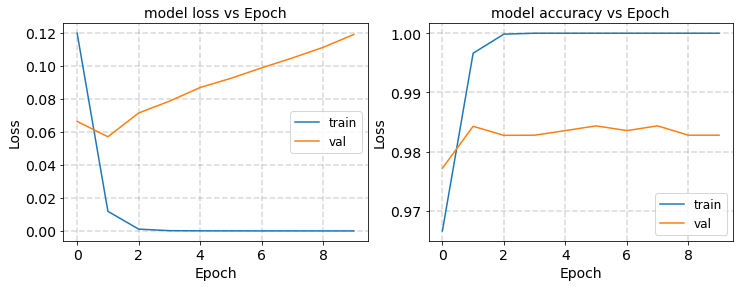

run 1


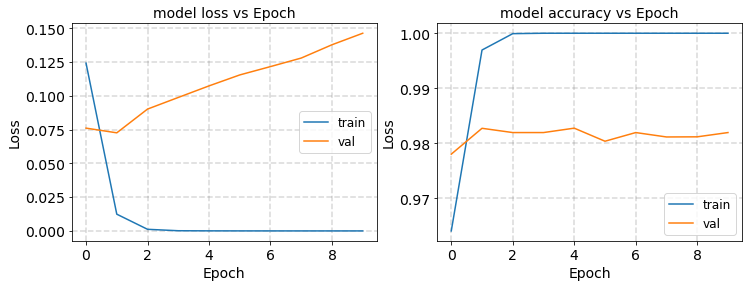

run 2


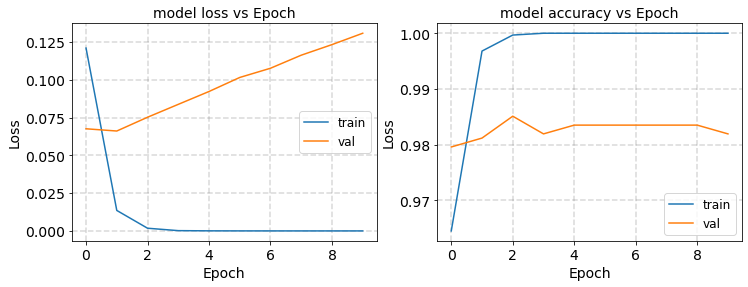

run 3


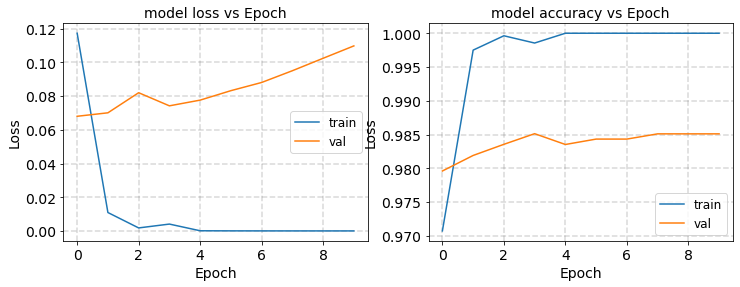

run 4


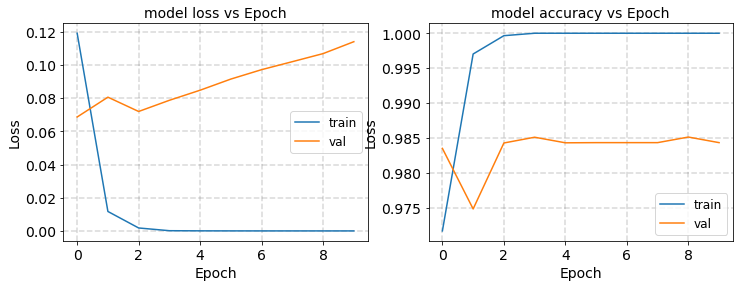

run 5


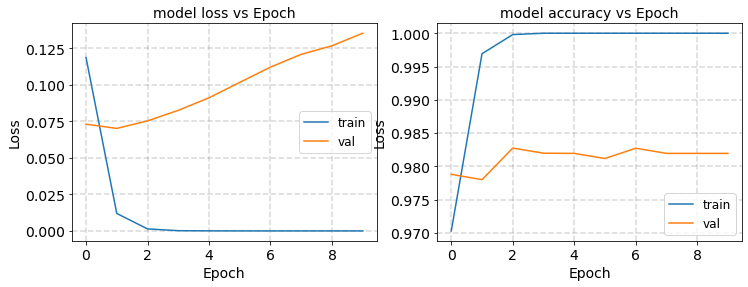

run 6


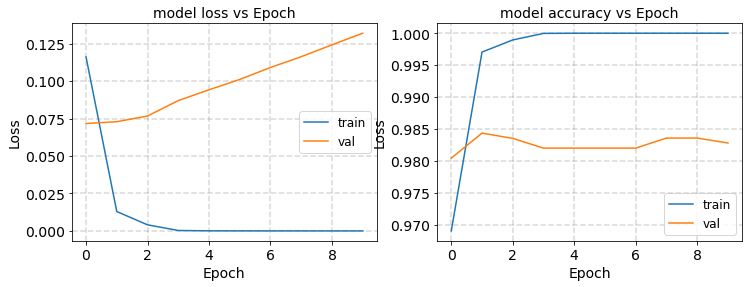

run 7


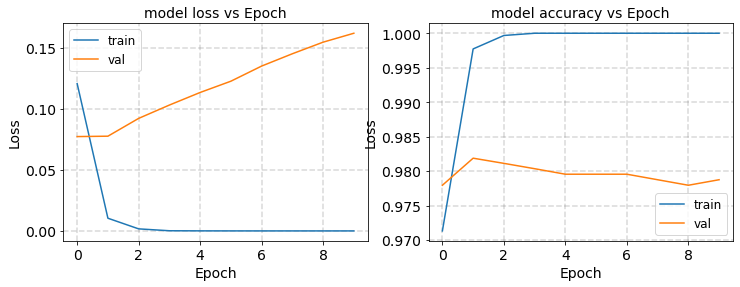

run 8


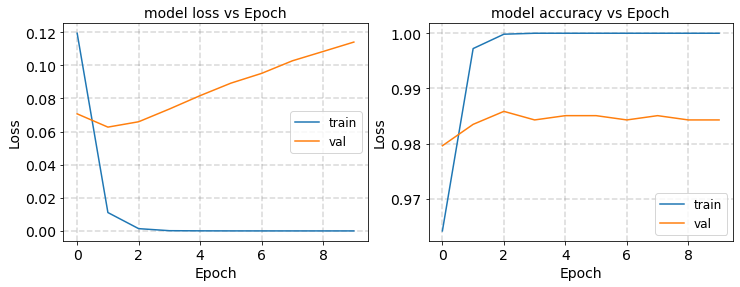

run 9


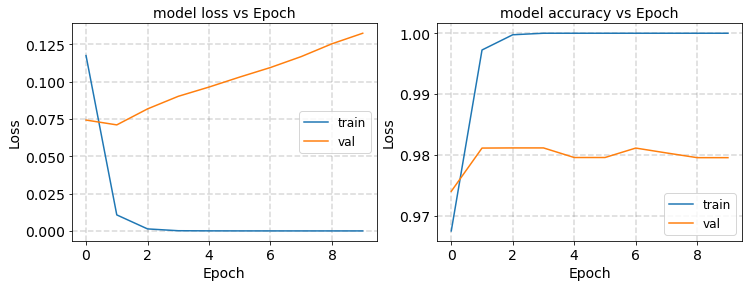

CPU times: user 18min 20s, sys: 1min 36s, total: 19min 57s
Wall time: 10min 44s


In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_sim_prune_08_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2467_sim_prune_08_4_128_run0,1.98388,1.98673,0.0209629,0.00468746,55,0.9,No,larger,0.982775
2467_sim_prune_08_4_128_run1,1.98634,1.97779,0.0176117,0.0039381,80,0.4,No,larger,0.98195
2467_sim_prune_08_4_128_run2,1.93526,1.96685,0.0282741,0.00632228,20,0.4,No,smaller,0.981925
2467_sim_prune_08_4_128_run3,2.02256,1.96132,0.024665,0.00551527,100,0,Yes,larger,0.9851
2467_sim_prune_08_4_128_run4,1.97017,2.00813,0.019273,0.00430957,5,0.1,No,smaller,0.984325
2467_sim_prune_08_4_128_run5,1.9326,1.98068,0.0351248,0.00785414,10,0.2,No,smaller,0.98195
2467_sim_prune_08_4_128_run6,1.98471,1.97879,0.029456,0.00658656,55,0.9,No,larger,0.9828
2467_sim_prune_08_4_128_run7,1.97814,1.9843,0.0225635,0.00504536,35,0.7,No,smaller,0.97875
2467_sim_prune_08_4_128_run8,1.87266,1.91825,0.0146897,0.00328473,0,0,Yes,smaller,0.9843
2467_sim_prune_08_4_128_run9,1.97536,1.96704,0.0310602,0.00694527,65,0.7,No,larger,0.979575


#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2467_sim_prune_08_4_128_run0,1.98388,1.98673,0.0209629,0.00468746,55,0.9,No,larger,0.982775
2467_sim_prune_08_4_128_run1,1.98634,1.97779,0.0176117,0.0039381,80,0.4,No,larger,0.98195
2467_sim_prune_08_4_128_run2,1.93526,1.96685,0.0282741,0.00632228,20,0.4,No,smaller,0.981925
2467_sim_prune_08_4_128_run3,2.02256,1.96132,0.024665,0.00551527,100,0,Yes,larger,0.9851
2467_sim_prune_08_4_128_run4,1.97017,2.00813,0.019273,0.00430957,5,0.1,No,smaller,0.984325
2467_sim_prune_08_4_128_run5,1.9326,1.98068,0.0351248,0.00785414,10,0.2,No,smaller,0.98195
2467_sim_prune_08_4_128_run6,1.98471,1.97879,0.029456,0.00658656,55,0.9,No,larger,0.9828
2467_sim_prune_08_4_128_run7,1.97814,1.9843,0.0225635,0.00504536,35,0.7,No,smaller,0.97875
2467_sim_prune_08_4_128_run8,1.87266,1.91825,0.0146897,0.00328473,0,0,Yes,smaller,0.9843
2467_sim_prune_08_4_128_run9,1.97536,1.96704,0.0310602,0.00694527,65,0.7,No,larger,0.979575


In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.        ,  0.        ,  0.06853532, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0667467 , -0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [-0.06643785,  0.        , -0.        , ...,  0.07160392,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        , -0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.983875569429754
1.986728416351219
0.020962937660522006
0.0046874553617017615
55.0
0.9
No
larger
0.9827749729156494
